## 15.2 가장 인기있는 머신러닝과 딥러닝 플랫폼 : 텐서플로우

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.3.0


## 15.3 구글 코래버러토리를Colaboratory를 이용한 텐서플로우 사용

In [1]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
 
# 패션 MNIST 데이터는 keras의 데이터셋에 있는데 이를 읽어와서 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


## 15.5 패션 MNIST는 레이블이 있는 이미지 데이터이다

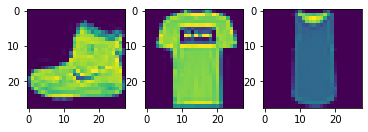

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [4]:
print(train_labels[:3])

[9 0 0]


## 15.6 딥러닝? 인공 신경망을 구축해 보자

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## 15.7 인공 신경망을 학습시켜 보자 : 최적화와 에폭

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 3.1587 - accuracy: 0.6983
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6593 - accuracy: 0.7766
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5483 - accuracy: 0.8113
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5178 - accuracy: 0.8229
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4900 - accuracy: 0.8310


In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.5241 - accuracy: 0.8284

테스트 정확도: 0.8284000158309937


## 15.8 학습된 신경망을 새 이미지에 적용해 보자

In [9]:
test_images.shape

(10000, 28, 28)

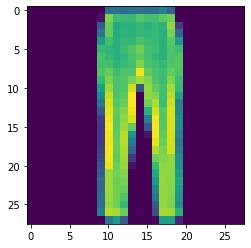

In [10]:
import numpy as np
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [11]:
yhat = model.predict(test_images[randIdx])

ValueError: ignored

In [12]:
yhat = model.predict( test_images[randIdx][np.newaxis, :, :])
yhat

array([[9.7762595e-15, 1.0000000e+00, 5.2455829e-16, 2.2041513e-11,
        3.3658717e-17, 8.5287015e-29, 9.7930682e-20, 0.0000000e+00,
        3.7003755e-21, 0.0000000e+00]], dtype=float32)

## 15.9 클래스를 찾아 출력하게 만들기

In [13]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

1

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
print(class_names[yhat])

Trouser


## 15.10 나만의 데이터 이용법 : 드라이브에 올린 파일 접근하기


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!pwd

/content


### 15.11 클라우드에 자료를 코랩에서 사용하기


In [23]:
!ls ./drive/'My Drive' -la

ls: './drive/My Drive/Prime-Python': No such file or directory
ls: './drive/My Drive/으뜸파이썬동영상': No such file or directory
ls: './drive/My Drive/데이터과학파이썬': No such file or directory
ls: './drive/My Drive/어썸파이썬': No such file or directory
ls: './drive/My Drive/데이터과학_파이썬_원고': No such file or directory
total 5985
lrw------- 1 root root       0 Aug 13 01:45  데이터과학_파이썬_원고 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬/0_데이터과학_파이썬_원고'
lrw------- 1 root root       0 Aug  6 08:27  어썸파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/어썸파이썬-초안'
lrw------- 1 root root       0 Aug  6 01:35  데이터과학파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬'
lrw------- 1 root root       0 Jun  5 04:55  으뜸파이썬동영상 -> '/content/drive/My Drive/3_연구_저술_영상자료/으뜸파이썬동영상'
-rw------- 1 root root     151 Jun 19 01:54 '퀴즈(응답)06-17.gsheet'
drwx------ 2 root root    4096 May 19 14:14  1_강의관련
-rw------- 1 root root   

## 15.12 드라이브의 이미지 파일을 읽어 화면에 표시해 보기

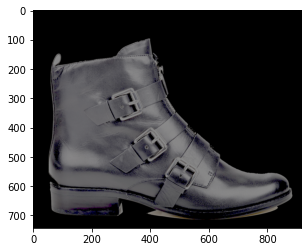

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./drive/My Drive/myData.png')
plt.imshow(img)

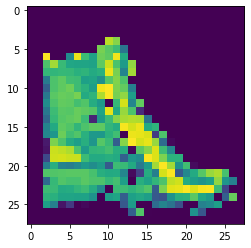

In [25]:
import cv2
img = cv2.imread('./drive/My Drive/myData.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

### 15.13 이미지를 모델에 입력으로 제공해 인식을 시도하자

In [28]:
input_data = img[np.newaxis, :, :]
input_data.shape

(1, 28, 28)

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
yhat = np.argmax( model.predict( input_data ) )

print(class_names[yhat])

Bag


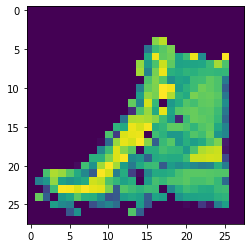

In [31]:
input_mirror = input_data[:, :, ::-1]
plt.imshow(input_mirror[0])

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
yhat = np.argmax( model.predict( input_mirror ) )

print(class_names[yhat])

Ankle boot


## 15.14 신경망 학습과 편향 : 학습의 한계를 인식하자

In [37]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3815 - accuracy: 0.5978
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6732 - accuracy: 0.7409
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5191 - accuracy: 0.8122
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8318
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4200 - accuracy: 0.8480


## 15.16 학습된 모델 저장하고 불러와서 사용하기

In [40]:
model2.save('./drive/My Drive/myFirstModel.h5')
!ls ./drive/'My Drive' -la

ls: './drive/My Drive/Prime-Python': No such file or directory
ls: './drive/My Drive/으뜸파이썬동영상': No such file or directory
ls: './drive/My Drive/데이터과학파이썬': No such file or directory
ls: './drive/My Drive/어썸파이썬': No such file or directory
ls: './drive/My Drive/데이터과학_파이썬_원고': No such file or directory
total 7327
lrw------- 1 root root       0 Aug 13 01:45  데이터과학_파이썬_원고 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬/0_데이터과학_파이썬_원고'
lrw------- 1 root root       0 Aug  6 08:27  어썸파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/어썸파이썬-초안'
lrw------- 1 root root       0 Aug  6 01:35  데이터과학파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬'
lrw------- 1 root root       0 Jun  5 04:55  으뜸파이썬동영상 -> '/content/drive/My Drive/3_연구_저술_영상자료/으뜸파이썬동영상'
-rw------- 1 root root     151 Jun 19 01:54 '퀴즈(응답)06-17.gsheet'
drwx------ 2 root root    4096 May 19 14:14  1_강의관련
-rw------- 1 root root   

In [43]:
model_imported = keras.models.load_model('./drive/My Drive/myFirstModel.h5')
model_imported.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [51]:
!ls -al ./drive/'My Drive'

ls: './drive/My Drive/Prime-Python': No such file or directory
ls: './drive/My Drive/으뜸파이썬동영상': No such file or directory
ls: './drive/My Drive/데이터과학파이썬': No such file or directory
ls: './drive/My Drive/어썸파이썬': No such file or directory
ls: './drive/My Drive/데이터과학_파이썬_원고': No such file or directory
total 7399
lrw------- 1 root root       0 Aug 13 01:45  데이터과학_파이썬_원고 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬/0_데이터과학_파이썬_원고'
lrw------- 1 root root       0 Aug  6 08:27  어썸파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/어썸파이썬-초안'
lrw------- 1 root root       0 Aug  6 01:35  데이터과학파이썬 -> '/content/drive/My Drive/3_연구_저술_영상자료/데이터과학을위한_알짜파이썬'
lrw------- 1 root root       0 Jun  5 04:55  으뜸파이썬동영상 -> '/content/drive/My Drive/3_연구_저술_영상자료/으뜸파이썬동영상'
-rw------- 1 root root     151 Jun 19 01:54 '퀴즈(응답)06-17.gsheet'
drwx------ 2 root root    4096 May 19 14:14  1_강의관련
-rw------- 1 root root   

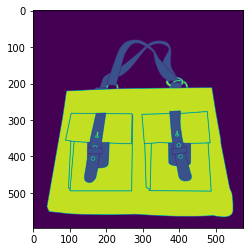

In [52]:
import cv2
img = cv2.imread('./drive/My Drive/bag_cartoon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

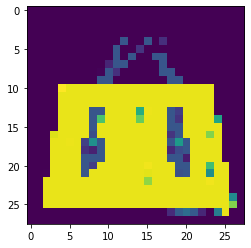

In [53]:
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

In [54]:
input_data = img[np.newaxis, :, :]
yhat = np.argmax( model_imported.predict( input_data ) )
print(class_names[yhat])


Bag
